# Logistic regression
(based on Andrew Ng machine learning course)
***

In [503]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Display plots inline

In [504]:
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 16, 10

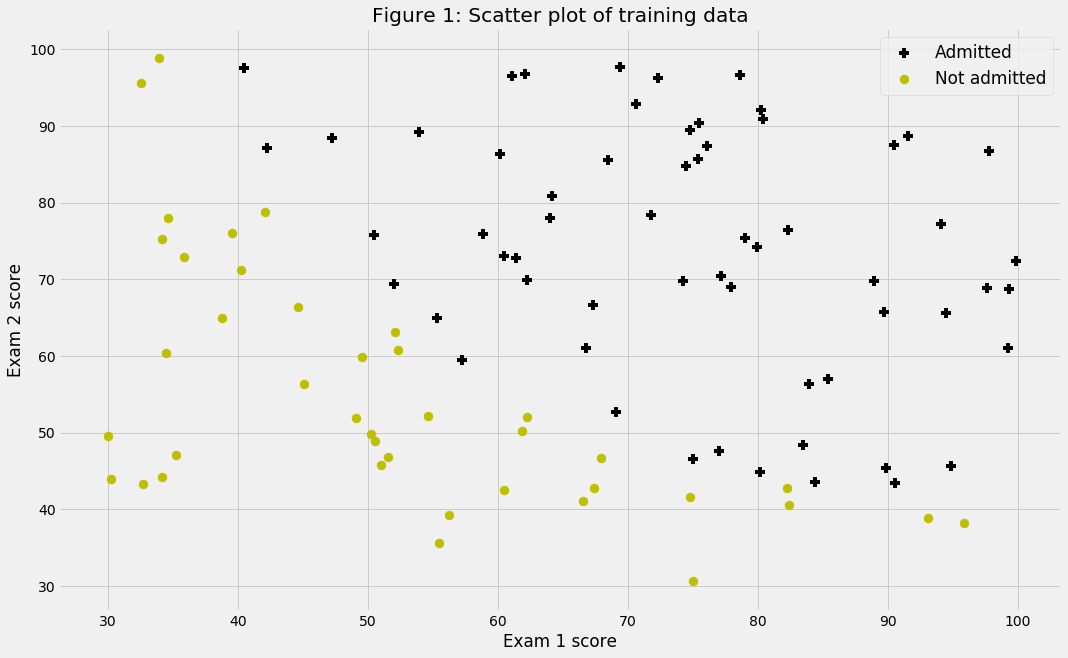

In [505]:
data = pd.read_csv('ex2data1.txt', header = None)
data.columns = ['ex_score1', 'ex_score2', 'result']

X = np.array([np.ones(data.shape[0]), data['ex_score1'], data['ex_score2']]).T
y = np.array([data['result']]).T
theta = np.zeros((X.shape[1], 1))

ind_true = np.where(y == 1)
ind_false = np.where(y == 0)

plt.scatter(X[ind_true[0], 1], X[ind_true[0], 2], s = 120, c = 'k', marker = '+', alpha = 1, label = 'Admitted')
plt.scatter(X[ind_false[0], 1], X[ind_false[0], 2], s = 80, c = 'y', marker = 'o', alpha = 1, label = 'Not admitted')
plt.legend(loc = 'upper right', prop = {'size': 17})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

### Normalization (feature scaling)

In [506]:
X1 = X.copy()
mu = np.mean((X[:, [1,2]]), axis = 0)
sigma = np.std(X[:, [1,2]], axis = 0, ddof = 1) #delta degree of freedom to fit into octave results
X[:, [1,2]] = (X[:, [1,2]] - mu) / sigma

## Cost function

In [507]:
def sigmoid(X, theta) :
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def cost_func(theta, X, y) :
    return (1 / X.shape[0]) * (np.dot(-y.T, np.log(sigmoid(X, theta))) - np.dot(1 - y.T, np.log(1 - sigmoid(X, theta))))

## Gradient descent

In [508]:
def gradient_descent(X, y, theta, alpha, iterations) :
    J_history = np.zeros((iterations, 1))
    m = X.shape[0]
    
    for i in range(iterations):
        J_der = sigmoid(X, theta) - y
        theta = theta - (alpha / m) * np.dot(J_der.T, X).T
        J_history[i] = cost_func(theta, X, y)
    return theta, J_history 

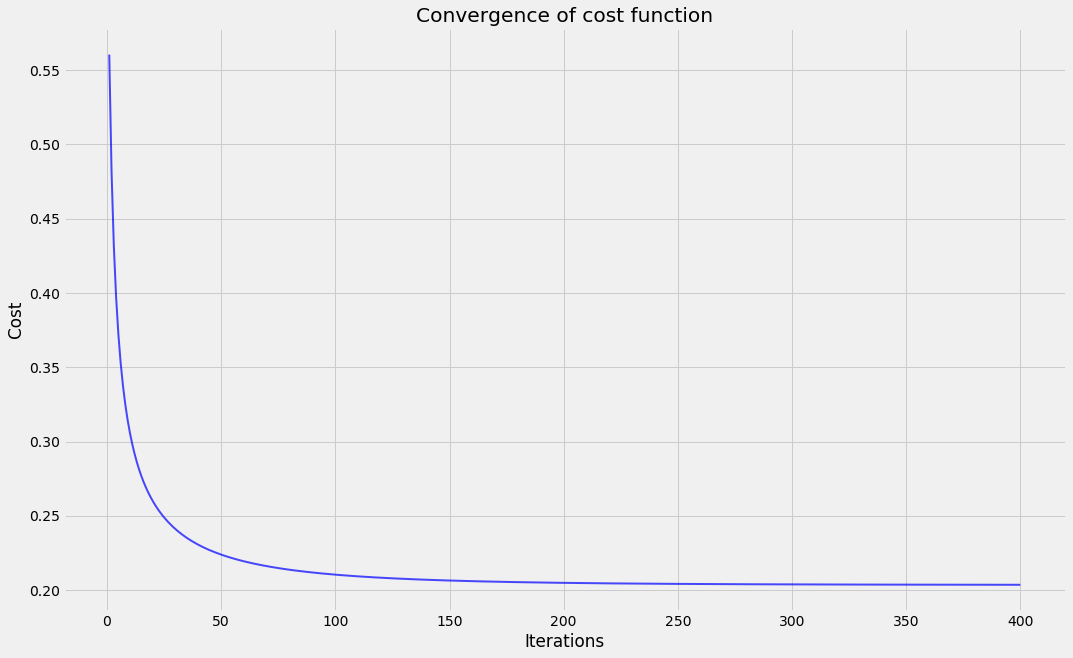

In [509]:
alpha = 1
iterations = 400
theta = np.zeros((X.shape[1], 1))

[theta, J_history] = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(np.linspace(1, iterations, iterations), J_history, 'b', alpha = 0.7, label = 'function',  linewidth = 2)
# plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of cost function')
plt.show()

## Plotting decision boundary for gradient descent

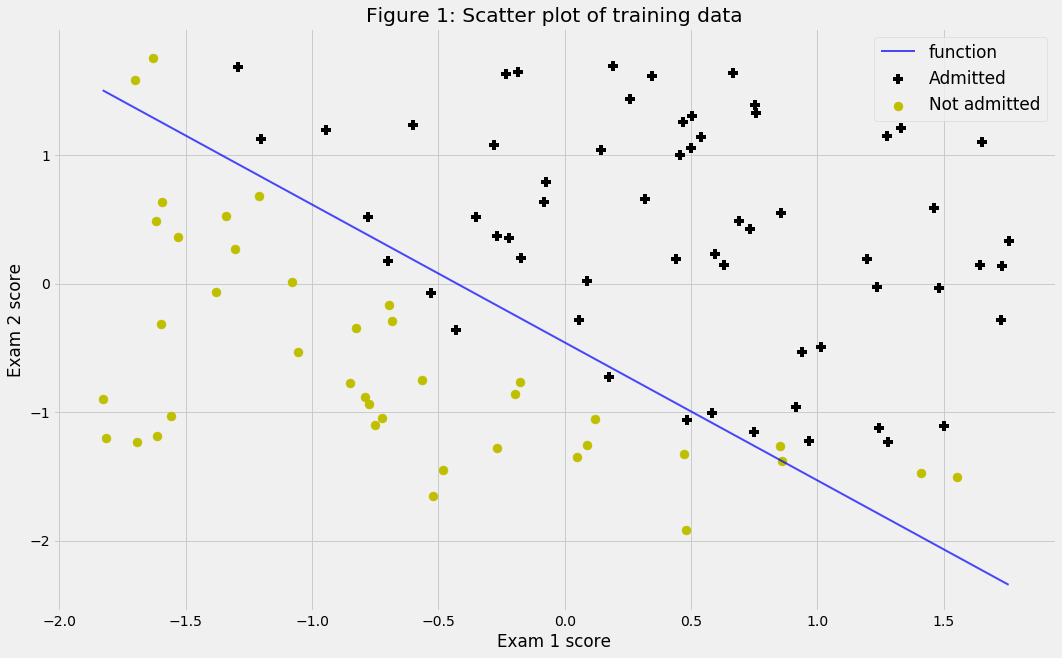

In [510]:
ind_true = np.where(y == 1)
ind_false = np.where(y == 0)

x_val = np.array([np.min(X[:, 1]),np.max(X[:, 1])])
y_val =-(theta[0] + theta[1] * x_val) / theta[2]

plt.scatter(X[ind_true[0], 1], X[ind_true[0], 2], s = 120, c = 'k', marker = '+', alpha = 1, label = 'Admitted')
plt.scatter(X[ind_false[0], 1], X[ind_false[0], 2], s = 80, c = 'y', marker = 'o', alpha = 1, label = 'Not admitted')
plt.plot(x_val, y_val, 'b', alpha = 0.7, label = 'function',  linewidth = 2)

plt.legend(loc = 'upper right', prop = {'size': 17})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

## Usage of scipy Nelder-Mead optimization algorithms

In [511]:
theta1 = np.zeros((X.shape[1], 1))
theta1 = minimize(cost_func, x0 = theta1, method = 'Nelder-Mead', args = (X1, y))['x']

## Plotting decision boundary for Nelder-Mead method

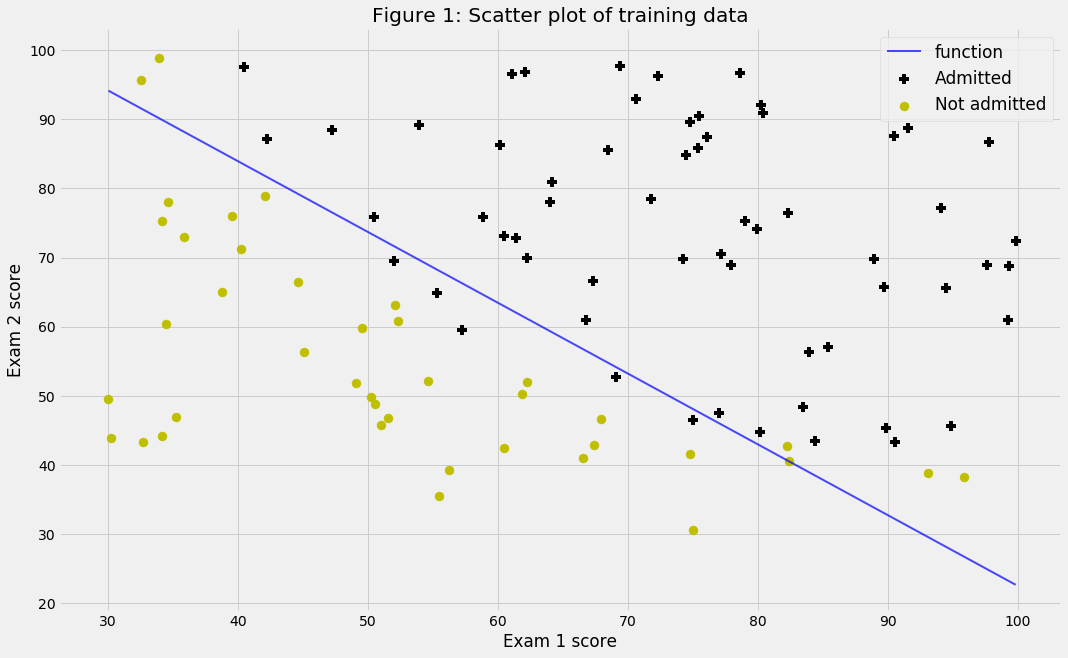

In [512]:
ind_true = np.where(y == 1)
ind_false = np.where(y == 0)

x_val = np.array([np.min(X1[:, 1]),np.max(X1[:, 1])])
y_val =-(theta1[0] + theta1[1] * x_val) / theta1[2]

plt.scatter(X1[ind_true[0], 1], X1[ind_true[0], 2], s = 120, c = 'k', marker = '+', alpha = 1, label = 'Admitted')
plt.scatter(X1[ind_false[0], 1], X1[ind_false[0], 2], s = 80, c = 'y', marker = 'o', alpha = 1, label = 'Not admitted')
plt.plot(x_val, y_val, 'b', alpha = 0.7, label = 'function',  linewidth = 2)

plt.legend(loc = 'upper right', prop = {'size': 17})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()